<a href="https://colab.research.google.com/github/BANOTHSANDEEP5/RandomForest-/blob/main/MTP2RandomForestRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [2]:
dataset = pd.read_excel('data.xlsx')

In [3]:
dataset

,Reference,Mix ID,water/binder,Binder (kg/m^3),Fly ash (%),GGBS (%),SP (%),Aggregate (CA/ FA),Curing Days,Curing condition,Porosity (%)
0,Younsi et al. (2011),RefI,0.60,301,0,0,0.00,1.27,28,Air,16.0
1,Younsi et al. (2011),RefII,0.54,321,0,0,1.00,1.27,28,Air,16.0
2,Younsi et al. (2011),FA30,0.53,301,100,0,1.75,1.27,28,Air,15.9
3,Younsi et al. (2011),FA50*,0.41,239,190,0,6.00,1.27,28,Air,16.8
4,Younsi et al. (2011),FA50,0.41,239,190,0,6.00,1.27,28,Air,16.3
...,...,...,...,...,...,...,...,...,...,...,...
237,Cheng et al. (2008),WB50-40,0.50,414,0,40,0.10,1.35,56,Air,6.2
238,Cheng et al. (2008),WB70,0.70,296,0,0,0.00,1.20,56,Air,7.4
239,Cheng et al. (2008),WB70-10,0.70,296,0,10,0.00,1.20,56,Air,8.2
240,Cheng et al. (2008),WB70-20,0.70,296,0,20,0.00,1.20,56,Air,7.2


In [4]:
dataset = dataset.iloc[:, 2:]

In [5]:
dataset

,water/binder,Binder (kg/m^3),Fly ash (%),GGBS (%),SP (%),Aggregate (CA/ FA),Curing Days,Curing condition,Porosity (%)
0,0.60,301,0,0,0.00,1.27,28,Air,16.0
1,0.54,321,0,0,1.00,1.27,28,Air,16.0
2,0.53,301,100,0,1.75,1.27,28,Air,15.9
3,0.41,239,190,0,6.00,1.27,28,Air,16.8
4,0.41,239,190,0,6.00,1.27,28,Air,16.3
...,...,...,...,...,...,...,...,...,...
237,0.50,414,0,40,0.10,1.35,56,Air,6.2
238,0.70,296,0,0,0.00,1.20,56,Air,7.4
239,0.70,296,0,10,0.00,1.20,56,Air,8.2
240,0.70,296,0,20,0.00,1.20,56,Air,7.2


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset['Curing condition'] = le.fit_transform(dataset['Curing condition'])

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   water/binder        242 non-null    float64
 1   Binder (kg/m^3)     242 non-null    int64  
 2   Fly ash (%)         242 non-null    int64  
 3   GGBS (%)            242 non-null    int64  
 4   SP (%)              242 non-null    float64
 5   Aggregate (CA/ FA)  242 non-null    float64
 6   Curing Days         242 non-null    int64  
 7   Curing condition    242 non-null    int64  
 8   Porosity (%)        242 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 17.1 KB


In [8]:
dataset.describe()

,water/binder,Binder (kg/m^3),Fly ash (%),GGBS (%),SP (%),Aggregate (CA/ FA),Curing Days,Curing condition,Porosity (%)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,0.479339,367.446281,18.198347,4.338843,0.317769,1.701074,88.851240,0.169421,10.398140
std,0.098185,75.706131,29.213940,10.573633,0.932023,0.289669,108.798772,0.375901,2.800595
min,0.350000,239.000000,0.000000,0.000000,0.000000,1.200000,1.000000,0.000000,2.200000
25%,0.400000,325.000000,0.000000,0.000000,0.000000,1.500000,28.000000,0.000000,8.400000
50%,0.500000,350.000000,10.000000,0.000000,0.000000,1.700000,28.000000,0.000000,10.355000
75%,0.540000,400.000000,30.000000,0.000000,0.100000,2.000000,91.000000,0.000000,12.175000
max,0.700000,591.000000,190.000000,40.000000,6.000000,2.000000,365.000000,1.000000,18.200000


In [9]:
dataset.corr()

,water/binder,Binder (kg/m^3),Fly ash (%),GGBS (%),SP (%),Aggregate (CA/ FA),Curing Days,Curing condition,Porosity (%)
water/binder,1.000000,-0.510701,-0.182718,0.156652,-0.255108,-0.536601,-0.178849,0.175059,0.207586
Binder (kg/m^3),-0.510701,1.000000,-0.303545,0.360420,0.049214,0.102857,-0.151126,-0.286408,-0.453192
Fly ash (%),-0.182718,-0.303545,1.000000,-0.256679,0.708347,-0.001790,0.062790,0.216836,0.387024
GGBS (%),0.156652,0.360420,-0.256679,1.000000,-0.022592,-0.404564,-0.264544,-0.185713,-0.307085
SP (%),-0.255108,0.049214,0.708347,-0.022592,1.000000,-0.221466,-0.156901,0.020389,0.315094
Aggregate (CA/ FA),-0.536601,0.102857,-0.001790,-0.404564,-0.221466,1.000000,0.532675,-0.357981,0.027882
Curing Days,-0.178849,-0.151126,0.062790,-0.264544,-0.156901,0.532675,1.000000,-0.159380,-0.156452
Curing condition,0.175059,-0.286408,0.216836,-0.185713,0.020389,-0.357981,-0.159380,1.000000,-0.010460
Porosity (%),0.207586,-0.453192,0.387024,-0.307085,0.315094,0.027882,-0.156452,-0.010460,1.000000


In [19]:
import seaborn as sb
import matplotlib.pyplot as plt
# Adjust the number of subplots based on the number of columns in your dataset
num_cols = len(dataset.columns)
num_rows = (num_cols + 2) // 3  # Calculate the number of rows based on 3 columns per row

# Set the figure size directly in subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(80, 80))

# Loop through columns
for i, ax in enumerate(axes.flat):
    if i < num_cols:
        col = dataset.columns[i]
        sb.barplot(data=dataset, x=col, y='Porosity (%)', ax=ax)
        ax.set_title(f'Porosity for {col}')  # Add a title for each subplot
    else:
        ax.axis('off')  # Turn off extra subplot if the number of columns doesn't evenly fit into 3 per row

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()

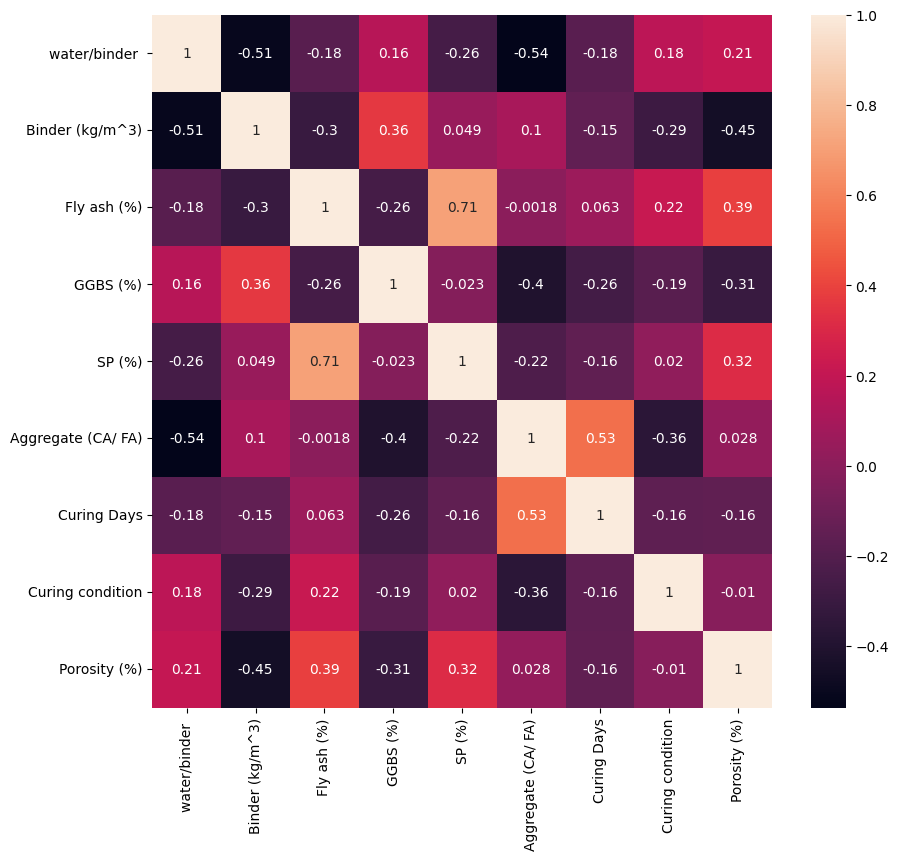

In [11]:
corrMatrix = dataset.corr()
plt.gcf().set_size_inches(10,9)
sb.heatmap(corrMatrix, annot=True)
plt.show()

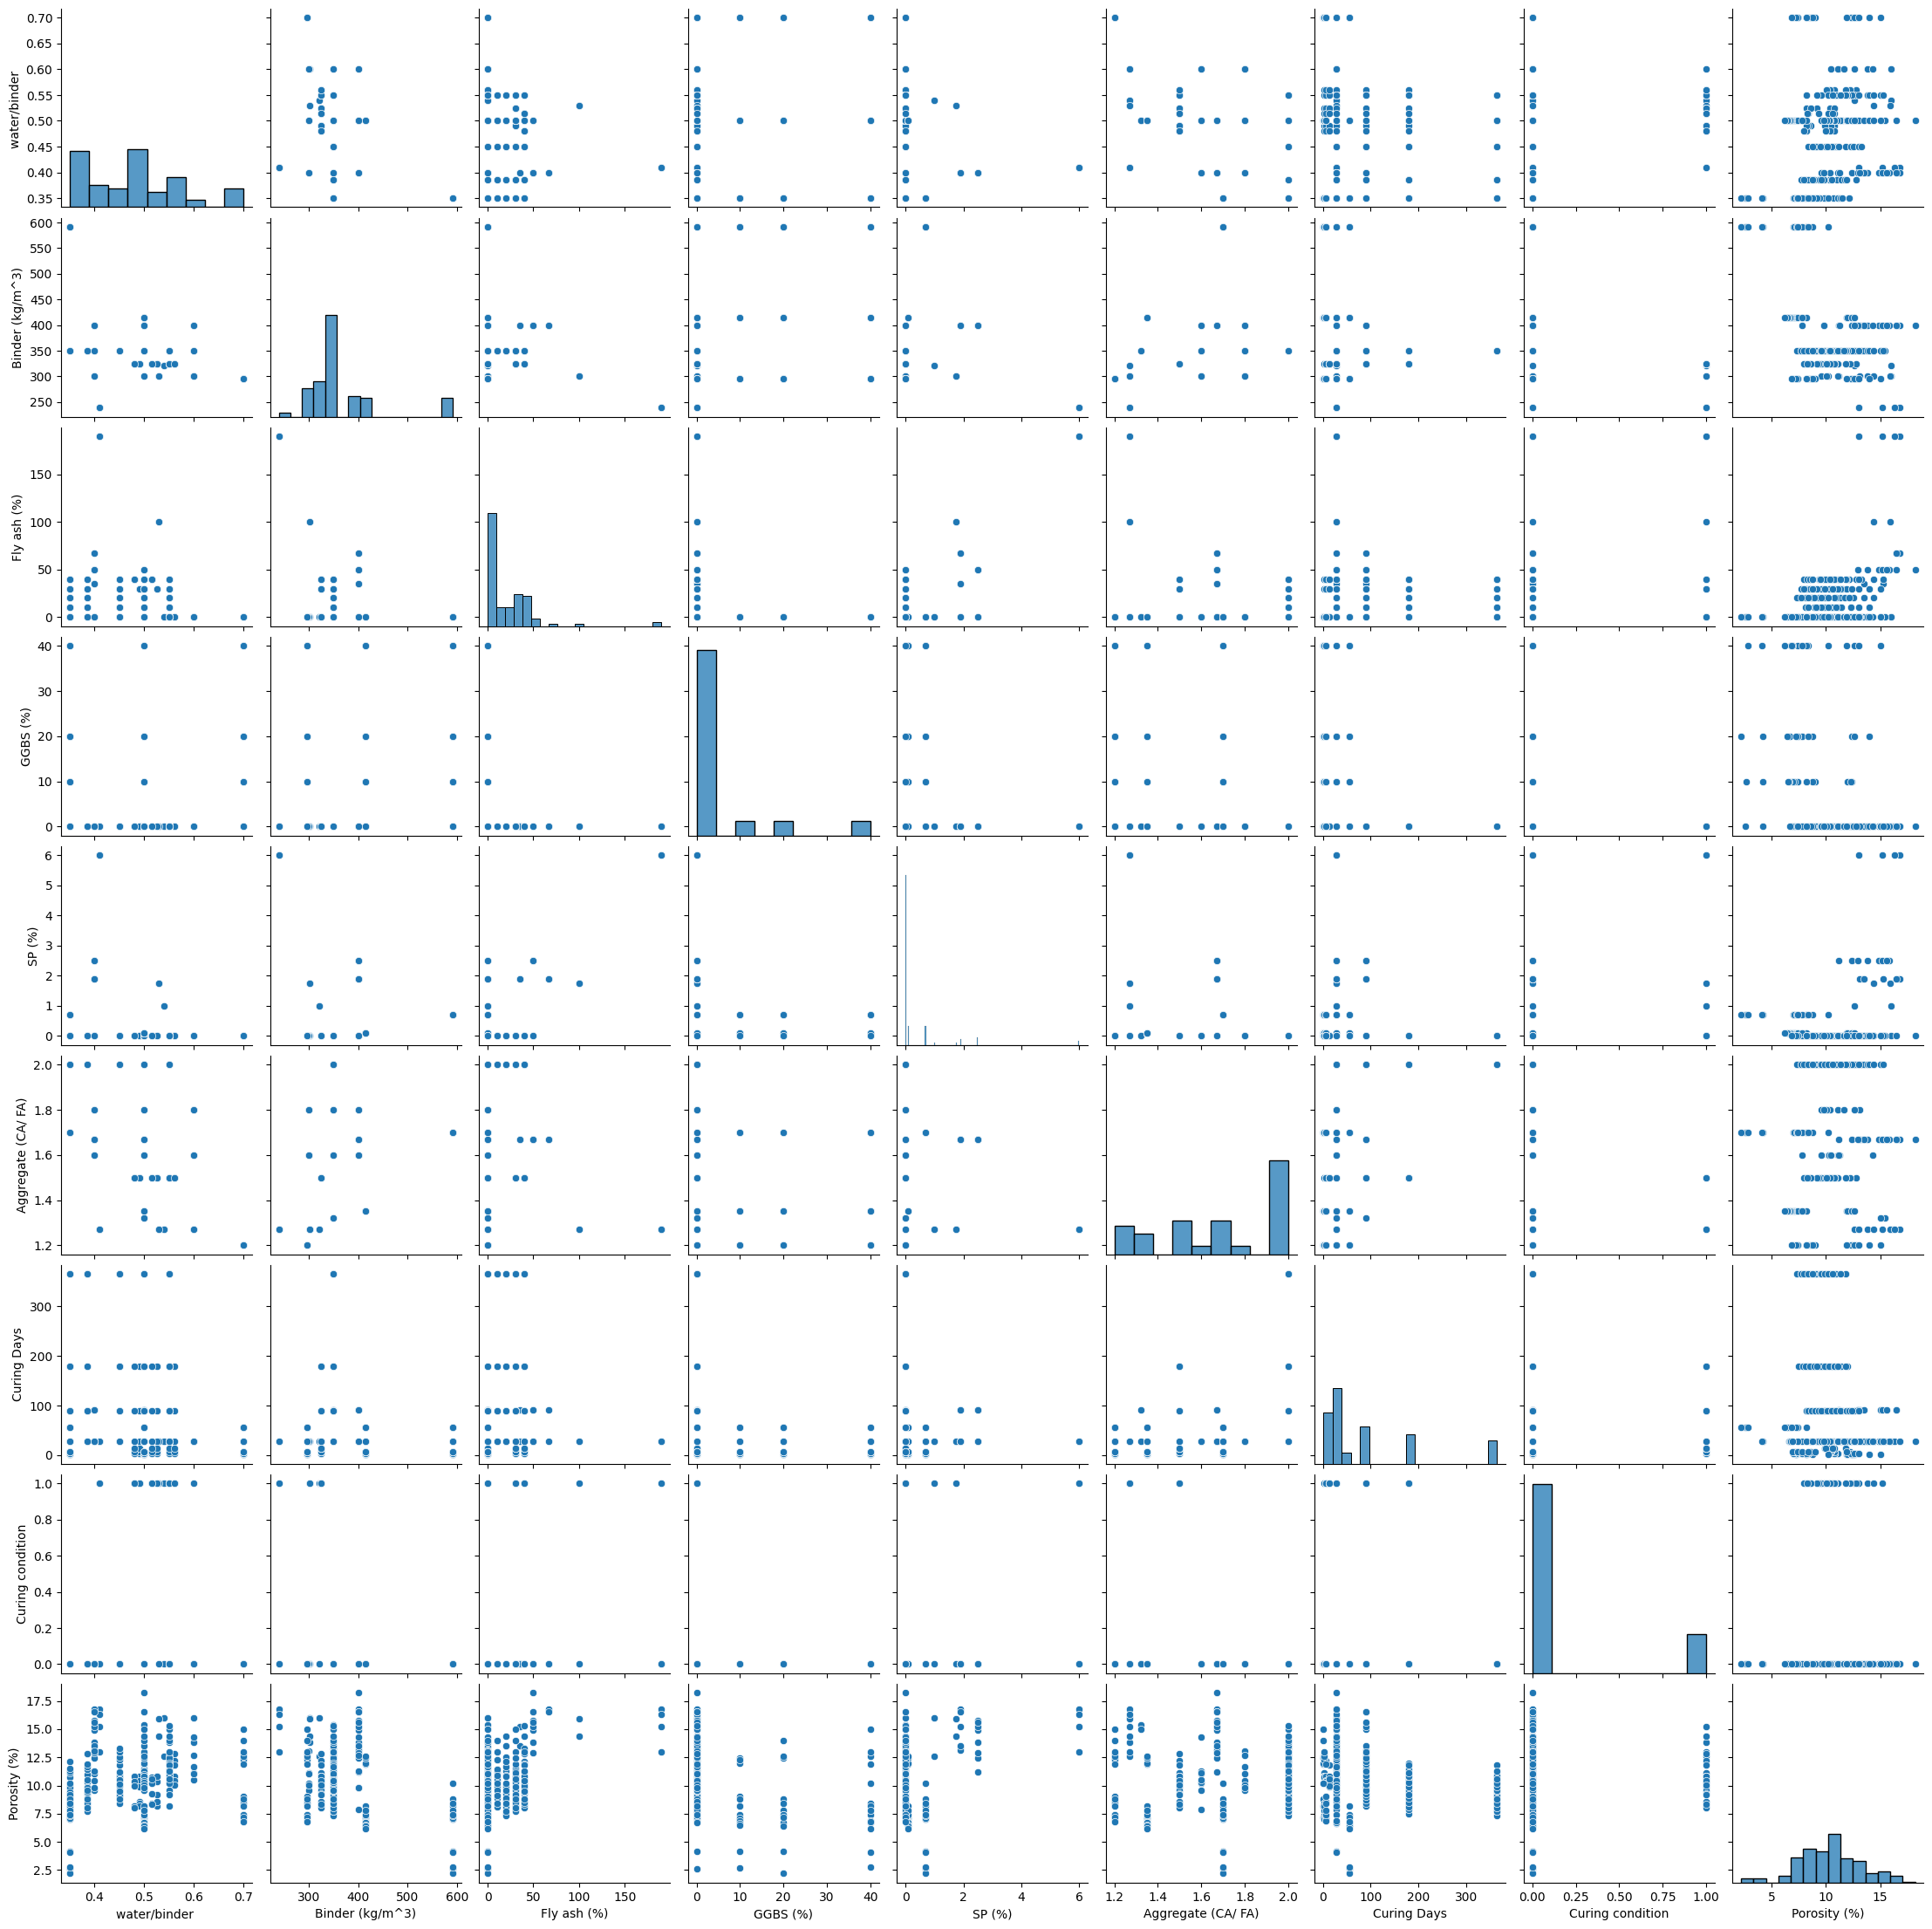

In [12]:

sb.pairplot(dataset)

In [13]:
target = dataset['Porosity (%)']
features = dataset.drop('Porosity (%)',axis=1)

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.25)

In [15]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=5 ,random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=5, random_state=0)

In [16]:
y_predict = regressor.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error , r2_score

r2 = r2_score(y_test, y_predict)
print('R-squared:', r2)

R-squared: 0.8085201250288894


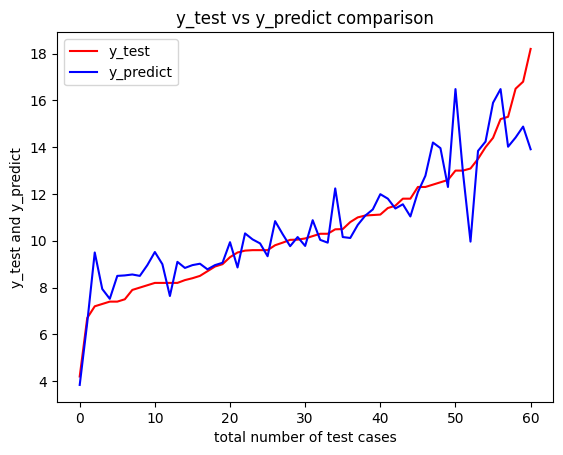

In [18]:
temp = [(y_test.values[i], y_predict[i]) for i in range(len(y_predict))]
temp = sorted(temp, key=lambda x: x[0])
temp1 = [u for (u,v) in temp]
temp2 = [v for (u,v) in temp]
x_axis = np.array(range(len(temp1)))

plt.plot(x_axis, temp1 , color = 'red', label='y_test')
plt.plot(x_axis, temp2 , color = 'blue', label='y_predict')

plt.title('y_test vs y_predict comparison')
plt.xlabel('total number of test cases')
plt.ylabel('y_test and y_predict')
plt.legend()
plt.show()
